In [77]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk 
from nltk.stem import PorterStemmer , WordNetLemmatizer
# from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM 


In [23]:
train_data =open('data/train.txt','r').readlines()
val_data =open('data/val.txt','r').readlines()
test_data =open('data/test.txt','r').readlines()

In [24]:
len(train_data) , len(val_data) ,len(test_data)

(16000, 2000, 2000)

In [25]:
full_data = train_data + val_data + test_data
len(full_data)

20000

In [26]:
full_data

['i didnt feel humiliated;sadness\n',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness\n',
 'im grabbing a minute to post i feel greedy wrong;anger\n',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love\n',
 'i am feeling grouchy;anger\n',
 'ive been feeling a little burdened lately wasnt sure why that was;sadness\n',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny;surprise\n',
 'i feel as confused about life as a teenager or as jaded as a year old man;fear\n',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit;joy\n',
 'i feel romantic too;love\n',
 'i feel like i have to make the suffering i m seeing mean something;sadness\n',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter;joy\n'

In [27]:
x = []
y = []

for line in full_data:
    message, label = line.strip().split(';')
    x.append(message)
    y.append(label)

df = pd.DataFrame({
    'message': x,
    'labels': y
})

In [28]:
len(x) , len(y)

(20000, 20000)

In [65]:
labels = list(set(y))
labels

['surprise', 'joy', 'sadness', 'love', 'fear', 'anger']

In [30]:
df = pd.DataFrame({
    'message': x,
    'labels': y
})


In [31]:
df.head()

,message,labels
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


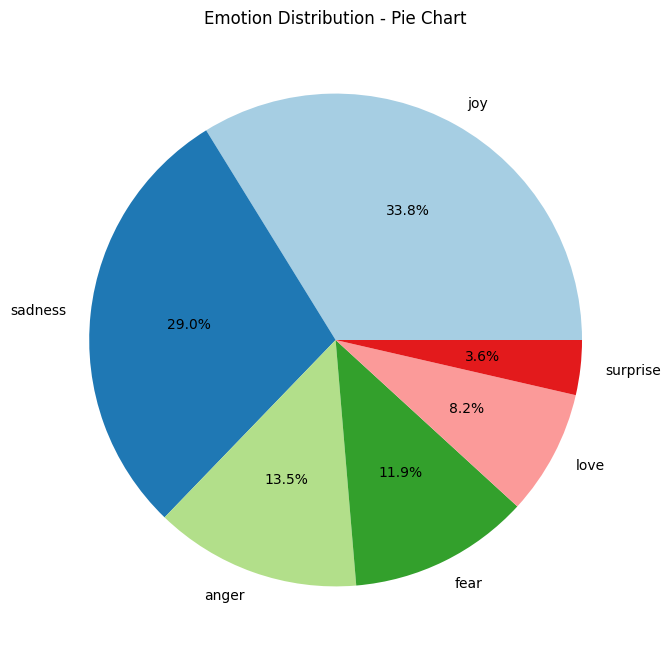

In [32]:
label_counts = df['labels'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(label_counts))))
plt.title('Emotion Distribution - Pie Chart')
plt.show()

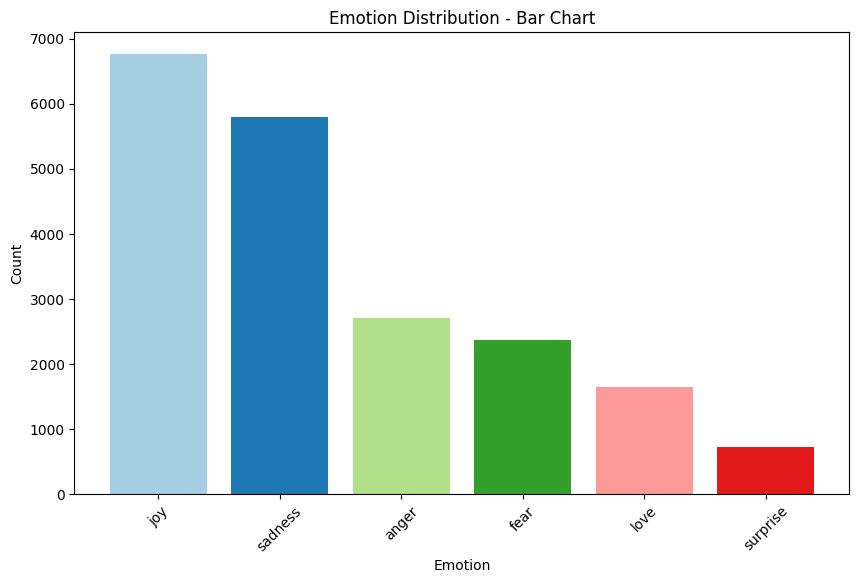

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color=plt.cm.Paired(range(len(label_counts))))
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution - Bar Chart')
plt.xticks(rotation=45)  # Rotate labels on x-axis for better readability
plt.show()

In [34]:
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# # Display the word cloud
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')  # Hide axes
# plt.title('Word Cloud of Messages')
# plt.show()

In [37]:
stemming = PorterStemmer()
def text_cleaning(messages,stemming):
    clean_data = []
    for message in messages: 
        message = message.lower()
        ls_of_words = nltk.word_tokenize(message)  # 
        word_without_stop_words = [word for word in ls_of_words if word not in stopwords.words('english')]
        ls_of_stemmed_words = [stemming.stem(word) for word in word_without_stop_words]
        clean_message = " ".join(ls_of_stemmed_words) 
        clean_data.append(clean_message)
    return clean_data

clean_data = text_cleaning(messages=x,stemming=stemming)

In [38]:
import os , joblib 
os.makedirs('clean_data',exist_ok=True)

joblib.dump(clean_data,"./clean_data/clean_text.lb")

['./clean_data/clean_text.lb']

In [ ]:
message = x[1]
message = message.lower()
ls_of_words = nltk.word_tokenize(message) # work as split() function

word_without_stop_words = [word for word in ls_of_words if word not in stopwords.words('english')]

stemming = PorterStemmer()
print(word_without_stop_words)
stemmed_words = [ ]
for word in word_without_stop_words:
    stemmed_words.append(stemming.stem(word))
print(stemmed_words)

['go', 'feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'cares', 'awake']
['go', 'feel', 'hopeless', 'damn', 'hope', 'around', 'someon', 'care', 'awak']


In [46]:
# Text to numerical 
tokenizer = Tokenizer(oov_token = '<nothing>')
tokenizer.fit_on_texts(clean_data)



In [47]:
len(clean_data)

20000

In [42]:
clean_data[0]

'didnt feel humili'

In [48]:
tokenizer.word_index

{'<nothing>': 1,
 'feel': 2,
 'like': 3,
 'im': 4,
 'get': 5,
 'time': 6,
 'know': 7,
 'realli': 8,
 'make': 9,
 'go': 10,
 'want': 11,
 'love': 12,
 'littl': 13,
 'think': 14,
 'peopl': 15,
 'day': 16,
 'thing': 17,
 'one': 18,
 'would': 19,
 'even': 20,
 'still': 21,
 'ive': 22,
 'life': 23,
 'bit': 24,
 'way': 25,
 'need': 26,
 'someth': 27,
 'much': 28,
 'dont': 29,
 'work': 30,
 'start': 31,
 'could': 32,
 'say': 33,
 'look': 34,
 'see': 35,
 'tri': 36,
 'back': 37,
 'good': 38,
 'pretti': 39,
 'come': 40,
 'right': 41,
 'alway': 42,
 'help': 43,
 'also': 44,
 'today': 45,
 'year': 46,
 'take': 47,
 'friend': 48,
 'use': 49,
 'around': 50,
 'cant': 51,
 'person': 52,
 'made': 53,
 'though': 54,
 'hate': 55,
 'well': 56,
 'got': 57,
 'happi': 58,
 'thought': 59,
 'someon': 60,
 'didnt': 61,
 'never': 62,
 'felt': 63,
 'find': 64,
 'write': 65,
 'lot': 66,
 'hope': 67,
 'quit': 68,
 'live': 69,
 'week': 70,
 'everi': 71,
 'sure': 72,
 'less': 73,
 'read': 74,
 'enough': 75,
 'give':

In [49]:
sequence = tokenizer.texts_to_sequences(clean_data)

In [50]:
sequence

[[61, 2, 522],
 [10, 2, 419, 682, 67, 50, 60, 96, 1229],
 [4, 1230, 431, 107, 2, 432, 192],
 [92, 2, 592, 3696, 7, 21, 2844],
 [2, 918],
 [22, 2, 13, 343, 170, 260, 72],
 [22, 47, 6002, 6, 1347, 712, 22, 2375, 1348, 66, 1610, 44, 2, 3, 355],
 [2, 339, 23, 1174, 713, 46, 196, 298],
 [4452, 46, 2, 4452, 897, 56, 53, 887, 2845],
 [2, 550],
 [2, 3, 9, 373, 35, 139, 27],
 [2, 134, 508, 240, 337, 449, 1199, 1685],
 [14, 4453, 6, 46, 2, 523],
 [2, 299, 371, 3697],
 [1762,
  1499,
  106,
  154,
  308,
  6003,
  958,
  36,
  64,
  6,
  65,
  1349,
  23,
  1142,
  2846,
  93,
  137,
  1350,
  1500,
  2,
  13,
  472],
 [2, 638, 919, 377],
 [61, 8, 2, 325],
 [2, 39, 496, 6],
 [31, 2, 786, 2082, 311, 514, 1269, 2083, 3698, 2082, 4454],
 [2, 2376, 759, 320, 71, 2377, 30, 111],
 [2, 160, 380, 90, 182, 80, 33, 80],
 [2,
  130,
  147,
  148,
  2217,
  43,
  2,
  787,
  1868,
  123,
  1351,
  1118,
  1017,
  143,
  103,
  524,
  959,
  17,
  639],
 [2, 760, 714],
 [113, 43, 4455, 4456, 89, 1143, 214, 2,

In [60]:
sequence[0:5]

[[61, 2, 522],
 [10, 2, 419, 682, 67, 50, 60, 96, 1229],
 [4, 1230, 431, 107, 2, 432, 192],
 [92, 2, 592, 3696, 7, 21, 2844],
 [2, 918]]

In [ ]:
# max(list(map(len,sequence)))                    
# used to find max length of the sub list

In [61]:
sequence = pad_sequences(sequence, padding = 'post' ,maxlen = max(list(map(len,sequence))))

In [62]:
sequence

array([[  61,    2,  522, ...,    0,    0,    0],
       [  10,    2,  419, ...,    0,    0,    0],
       [   4, 1230,  431, ...,    0,    0,    0],
       ...,
       [   2,   49,   15, ...,    0,    0,    0],
       [   4,    2,  200, ...,    0,    0,    0],
       [   2,  171,  362, ...,    0,    0,    0]])

In [55]:
# def length_of_longest_sublists(sequence):
#     if not sequence:
#         return 0  # Return 0 if the list of lists is empty

#     # Find the length of the longest sublist
#     max_length = max(len(sublist) for sublist in sequence)
    
#     return max_length
# longest_length = length_of_longest_sublists(sequence)

# print(f"The length of the longest sublist is: {longest_length}")


The length of the longest sublist is: 35


In [67]:
labels = list(set(y))
labels

['surprise', 'joy', 'sadness', 'love', 'fear', 'anger']

In [69]:
label_dict = {labels : i for i , labels in enumerate(labels)}
label_dict


{'surprise': 0, 'joy': 1, 'sadness': 2, 'love': 3, 'fear': 4, 'anger': 5}

In [71]:
y_labeled = []
for labels in y :
   y_labeled.append(label_dict[labels])

labels = np.array(y_labeled)

In [72]:
labels

array([2, 2, 5, ..., 1, 1, 4])

In [74]:
# sequence # X-DATA
# labels # Y- DATA

In [80]:
# Training Testing 
x_train,x_test,y_train , y_test = train_test_split(sequence, labels, test_size=0.16)

In [ ]:
# multi class classfication ---> categorical , sparse_categorical_crossentropy
# label Encode ==> sparse_categorical_crossentropy
# One hot Encode ==> categorical

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM 
model = Sequential([LSTM(units=64,input_shape=(35,1),return_sequences=True),#Hidden layer 1, #Activation function by default tanh 
                   LSTM(units=32),# Hidden layer 2
                   Dense(units=6, activation='softmax')]) # Output Layer 

model.compile(loss="sparse_categorical_crossentropy" ,optimizer = 'adam' , metrics = ['accuracy'])
model.summary()



c:\Users\Vinayak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 35, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,510 (115.27 KB)

 Trainable params: 29,510 (115.27 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
# Train the algos
history =model.fit(x_train , y_train , epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3412 - loss: 1.5680 - val_accuracy: 0.3484 - val_loss: 1.5672
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3421 - loss: 1.5711 - val_accuracy: 0.3478 - val_loss: 1.5598
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3618 - loss: 1.5620 - val_accuracy: 0.3487 - val_loss: 1.5587
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3508 - loss: 1.5663 - val_accuracy: 0.3494 - val_loss: 1.5581
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3558 - loss: 1.5650 - val_accuracy: 0.3516 - val_loss: 1.5600
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3549 - loss: 1.5546 - val_accuracy: 0.3512 - val_loss: 1.5556
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3539 - loss: 1.5645 - val_accuracy: 0.3481 - val_loss: 1.5558
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3578 - loss: 1.5571 - val_accu

<Axes: >

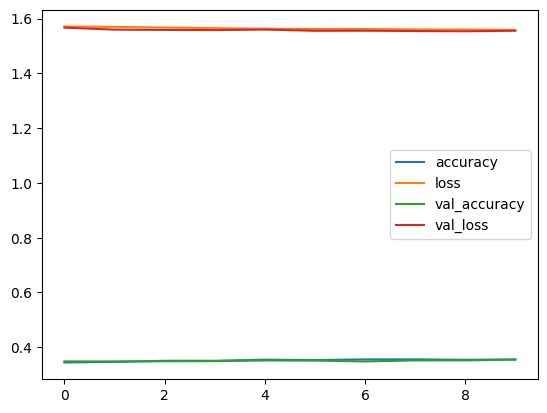

In [83]:
pd.DataFrame(history.history).plot()

In [85]:
pred= model.predict(x_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [86]:
pred

array([[0.03919224, 0.35229775, 0.28461897, 0.08053169, 0.11308222,
        0.13027722],
       [0.03018464, 0.30952507, 0.31705865, 0.0620994 , 0.1463882 ,
        0.13474397],
       [0.03195708, 0.2887797 , 0.33131725, 0.06205567, 0.15514357,
        0.1307468 ],
       ...,
       [0.03234128, 0.37874952, 0.25300905, 0.08152783, 0.11733246,
        0.13703988],
       [0.02211918, 0.26547262, 0.37519538, 0.0434307 , 0.17098676,
        0.12279538],
       [0.0286318 , 0.3129826 , 0.31769124, 0.060268  , 0.14031371,
        0.14011261]], dtype=float32)

In [93]:
pred.shape , x_test.shape

((3200, 6), (3200, 35))

In [98]:
Predictions = np.argmax(pred, axis=1)

In [97]:
y_test


array([1, 3, 2, ..., 3, 2, 1])

In [99]:
Evaluation_df = pd.DataFrame({'Actual_Value': y_test , 'Predictions': Predictions})
Evaluation_df.head()

,Actual_Value,Predictions
0,1,1
1,3,2
2,2,2
3,5,1
4,4,1


In [100]:
label_dict

{'surprise': 0, 'joy': 1, 'sadness': 2, 'love': 3, 'fear': 4, 'anger': 5}

In [102]:
label = {0:'surprise', 1:'joy', 2:'sadness', 3:'love',4: 'fear',5:'anger'}
label

{0: 'surprise', 1: 'joy', 2: 'sadness', 3: 'love', 4: 'fear', 5: 'anger'}

In [103]:
Evaluation_df['Actual_Value']=Evaluation_df['Actual_Value'].map(label)
Evaluation_df['Predictions']=Evaluation_df['Predictions'].map(label)

In [104]:
Evaluation_df

,Actual_Value,Predictions
0,joy,joy
1,love,sadness
2,sadness,sadness
3,anger,joy
4,fear,joy
...,...,...
3195,sadness,joy
3196,anger,joy
3197,love,joy
3198,sadness,sadness


In [105]:
os.makedirs('Prediction', exist_ok=True)
Evaluation_df.to_csv('./Prediction/Prediction.csv', index_label=False)

os.makedirs('models',exist_ok=True)
model.save('./models/lstm.model.h5')